In [1]:
import imageio
import torch
from PIL import Image
from torchvision import transforms
import numpy as np
from matplotlib import pyplot as plt

C:\Users\colef\anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\colef\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
#Red Images
img_arr  = imageio.imread("red1.jpg")
img_arr2 = imageio.imread("red2.jpg")
img_arr3 = imageio.imread("red3.jpg")
img_arr4 = imageio.imread("red4.jpg")

#Green Images
img_arr5 = imageio.imread("green1.jpg")
img_arr6 = imageio.imread("green2.jpg")
img_arr7 = imageio.imread("green3.jpg")
img_arr8 = imageio.imread("green4.jpg")

#Blue Images
img_arr9  = imageio.imread("blue1.jpg")
img_arr10 = imageio.imread("blue2.jpg")
img_arr11 = imageio.imread("blue3.jpg")
img_arr12 = imageio.imread("blue4.jpg")

In [3]:
transform = transforms.ToTensor()
#Red
img_t = transform(img_arr)
img_t2 = transform(img_arr2)
img_t3 = transform(img_arr3) 
img_t4 = transform(img_arr4)

#Green
img_t5 = transform(img_arr5)
img_t6 = transform(img_arr6)
img_t7 = transform(img_arr7)
img_t8 = transform(img_arr8)

#Blue 
img_t9 = transform(img_arr9)
img_t10 = transform(img_arr10)
img_t11 = transform(img_arr11)
img_t12 = transform(img_arr12)


In [4]:
#Red
r1_data = torch.mean(img_t, dim =[1,2])
r2_data = torch.mean(img_t2,dim =[1,2])
r3_data = torch.mean(img_t3,dim =[1,2])
r4_data = torch.mean(img_t4,dim =[1,2])

#Green
g1_data = torch.mean(img_t5,dim =[1,2])
g2_data = torch.mean(img_t6,dim =[1,2])
g3_data = torch.mean(img_t7,dim =[1,2])
g4_data = torch.mean(img_t8,dim =[1,2])

#Blue
b1_data = torch.mean(img_t9, dim =[1,2])
b2_data = torch.mean(img_t10, dim =[1,2])
b3_data = torch.mean(img_t11, dim =[1,2])
b4_data = torch.mean(img_t12, dim =[1,2])

In [5]:
#Red Mean's
print("Red Photo Mean Values")
print(r1_data)
print(r2_data)
print(r3_data)
print(r4_data)

#Green Mean's
print("Green Photo Mean Values")
print(g1_data)
print(g2_data)
print(g3_data)
print(g4_data)

#Blue Mean's
print("Blue Photo Mean Values")
print(b1_data)
print(b2_data)
print(b3_data)
print(b4_data)

Red Photo Mean Values
tensor([0.5990, 0.2829, 0.3058])
tensor([0.6159, 0.0791, 0.0599])
tensor([0.8550, 0.2780, 0.1751])
tensor([0.4243, 0.0689, 0.0434])
Green Photo Mean Values
tensor([0.0350, 0.3234, 0.0344])
tensor([0.1148, 0.4722, 0.1004])
tensor([0.0113, 0.1856, 0.0130])
tensor([0.0842, 0.3544, 0.2341])
Blue Photo Mean Values
tensor([0.0512, 0.1268, 0.4566])
tensor([0.2790, 0.3756, 0.5157])
tensor([0.1885, 0.2697, 0.4691])
tensor([0.0662, 0.2138, 0.4504])


In [6]:
##############################################################################################################################
#Problem 2
##############################################################################################################################

In [7]:
#Temperature Predicition Example
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
def model(t_u, w1, w2, b):
    return w2 * t_u**2 + w1 * t_u + b

In [8]:
#Calculate the loss:
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w1, w2, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [9]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [10]:
#Check the value of the loss
loss = loss_fn(t_p, t_c)
loss

tensor(11709471.)

In [11]:
#Calculate the Derivatives and Gradient
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [12]:
#Calculate the Derivatives and Gradient
def dmodel_dw1(t_u, w1, w2, b):
    return t_u

In [13]:
def dmodel_dw2(t_u, w1, w2, b):
    return t_u**2

In [14]:
#Calculate the Derivatives and Gradient
def dmodel_db(t_u, w1, w2, b):
    return 1.0

In [15]:
#Putting everything together
def grad_fn(t_u, t_c, t_p, w1, w2, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, w2, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w1, w2, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w1 , w2, b)
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])

In [16]:
#Iterating to Fit the Model
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w1, w2, b = params
    
        t_p = model(t_u, w1, w2, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w1, w2, b)
    
        params = params - learning_rate * grad
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [17]:
#Normalize the data.
t_un = 0.1 * t_u

In [18]:
# Finding the right learning rate #Doesn't converge given learning rate. 
#params = training_loop(
#n_epochs = 5000,
#learning_rate = .1,
#params = torch.tensor([1.0, 1.0, 0.0]),
#t_u = t_un,
#t_c = t_c)

In [19]:
#%matplotlib inline
#from matplotlib import pyplot as plt
#t_p1 = model(t_un, *params)
#fig = plt.figure(dpi=600)
#plt.xlabel("Temperature (°Fahrenheit)")
#plt.ylabel("Temperature (°Celsius)")
#plt.plot(t_u.numpy(), t_p1.detach().numpy())
#plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [20]:
#params = training_loop(
#n_epochs = 5000,
#learning_rate = .01,
#params = torch.tensor([1.0, 1.0, 0.0]),
#t_u = t_un,
#t_c = t_c)

In [21]:
#matplotlib inline #Doesn't Converge given learning rate.
#t_p2 = model(t_un, *params)
#fig = plt.figure(dpi=600)
#plt.xlabel("Temperature (°Fahrenheit)")
#plt.ylabel("Temperature (°Celsius)")
#plt.plot(t_u.numpy(), t_p2.detach().numpy())
#plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [22]:
#params3 = training_loop(   #Doesn't Converge given learning rate.
#n_epochs = 5000,
#learning_rate = .001,
#params = torch.tensor([1.0, 1.0, 0.0]),
#t_u = t_un,
#t_c = t_c)


In [23]:
#%matplotlib inline
#t_p3 = model(t_un, *params)
#fig = plt.figure(dpi=600)
#plt.xlabel("Temperature (°Fahrenheit)")
#plt.ylabel("Temperature (°Celsius)")
#plt.plot(t_u.numpy(), t_p3.detach().numpy())
#plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [24]:
params = training_loop(
n_epochs = 5000,
learning_rate = .0001,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c)

Epoch 500, Loss 10.708597
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123476
Epoch 2500, Loss 5.377228
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465787
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


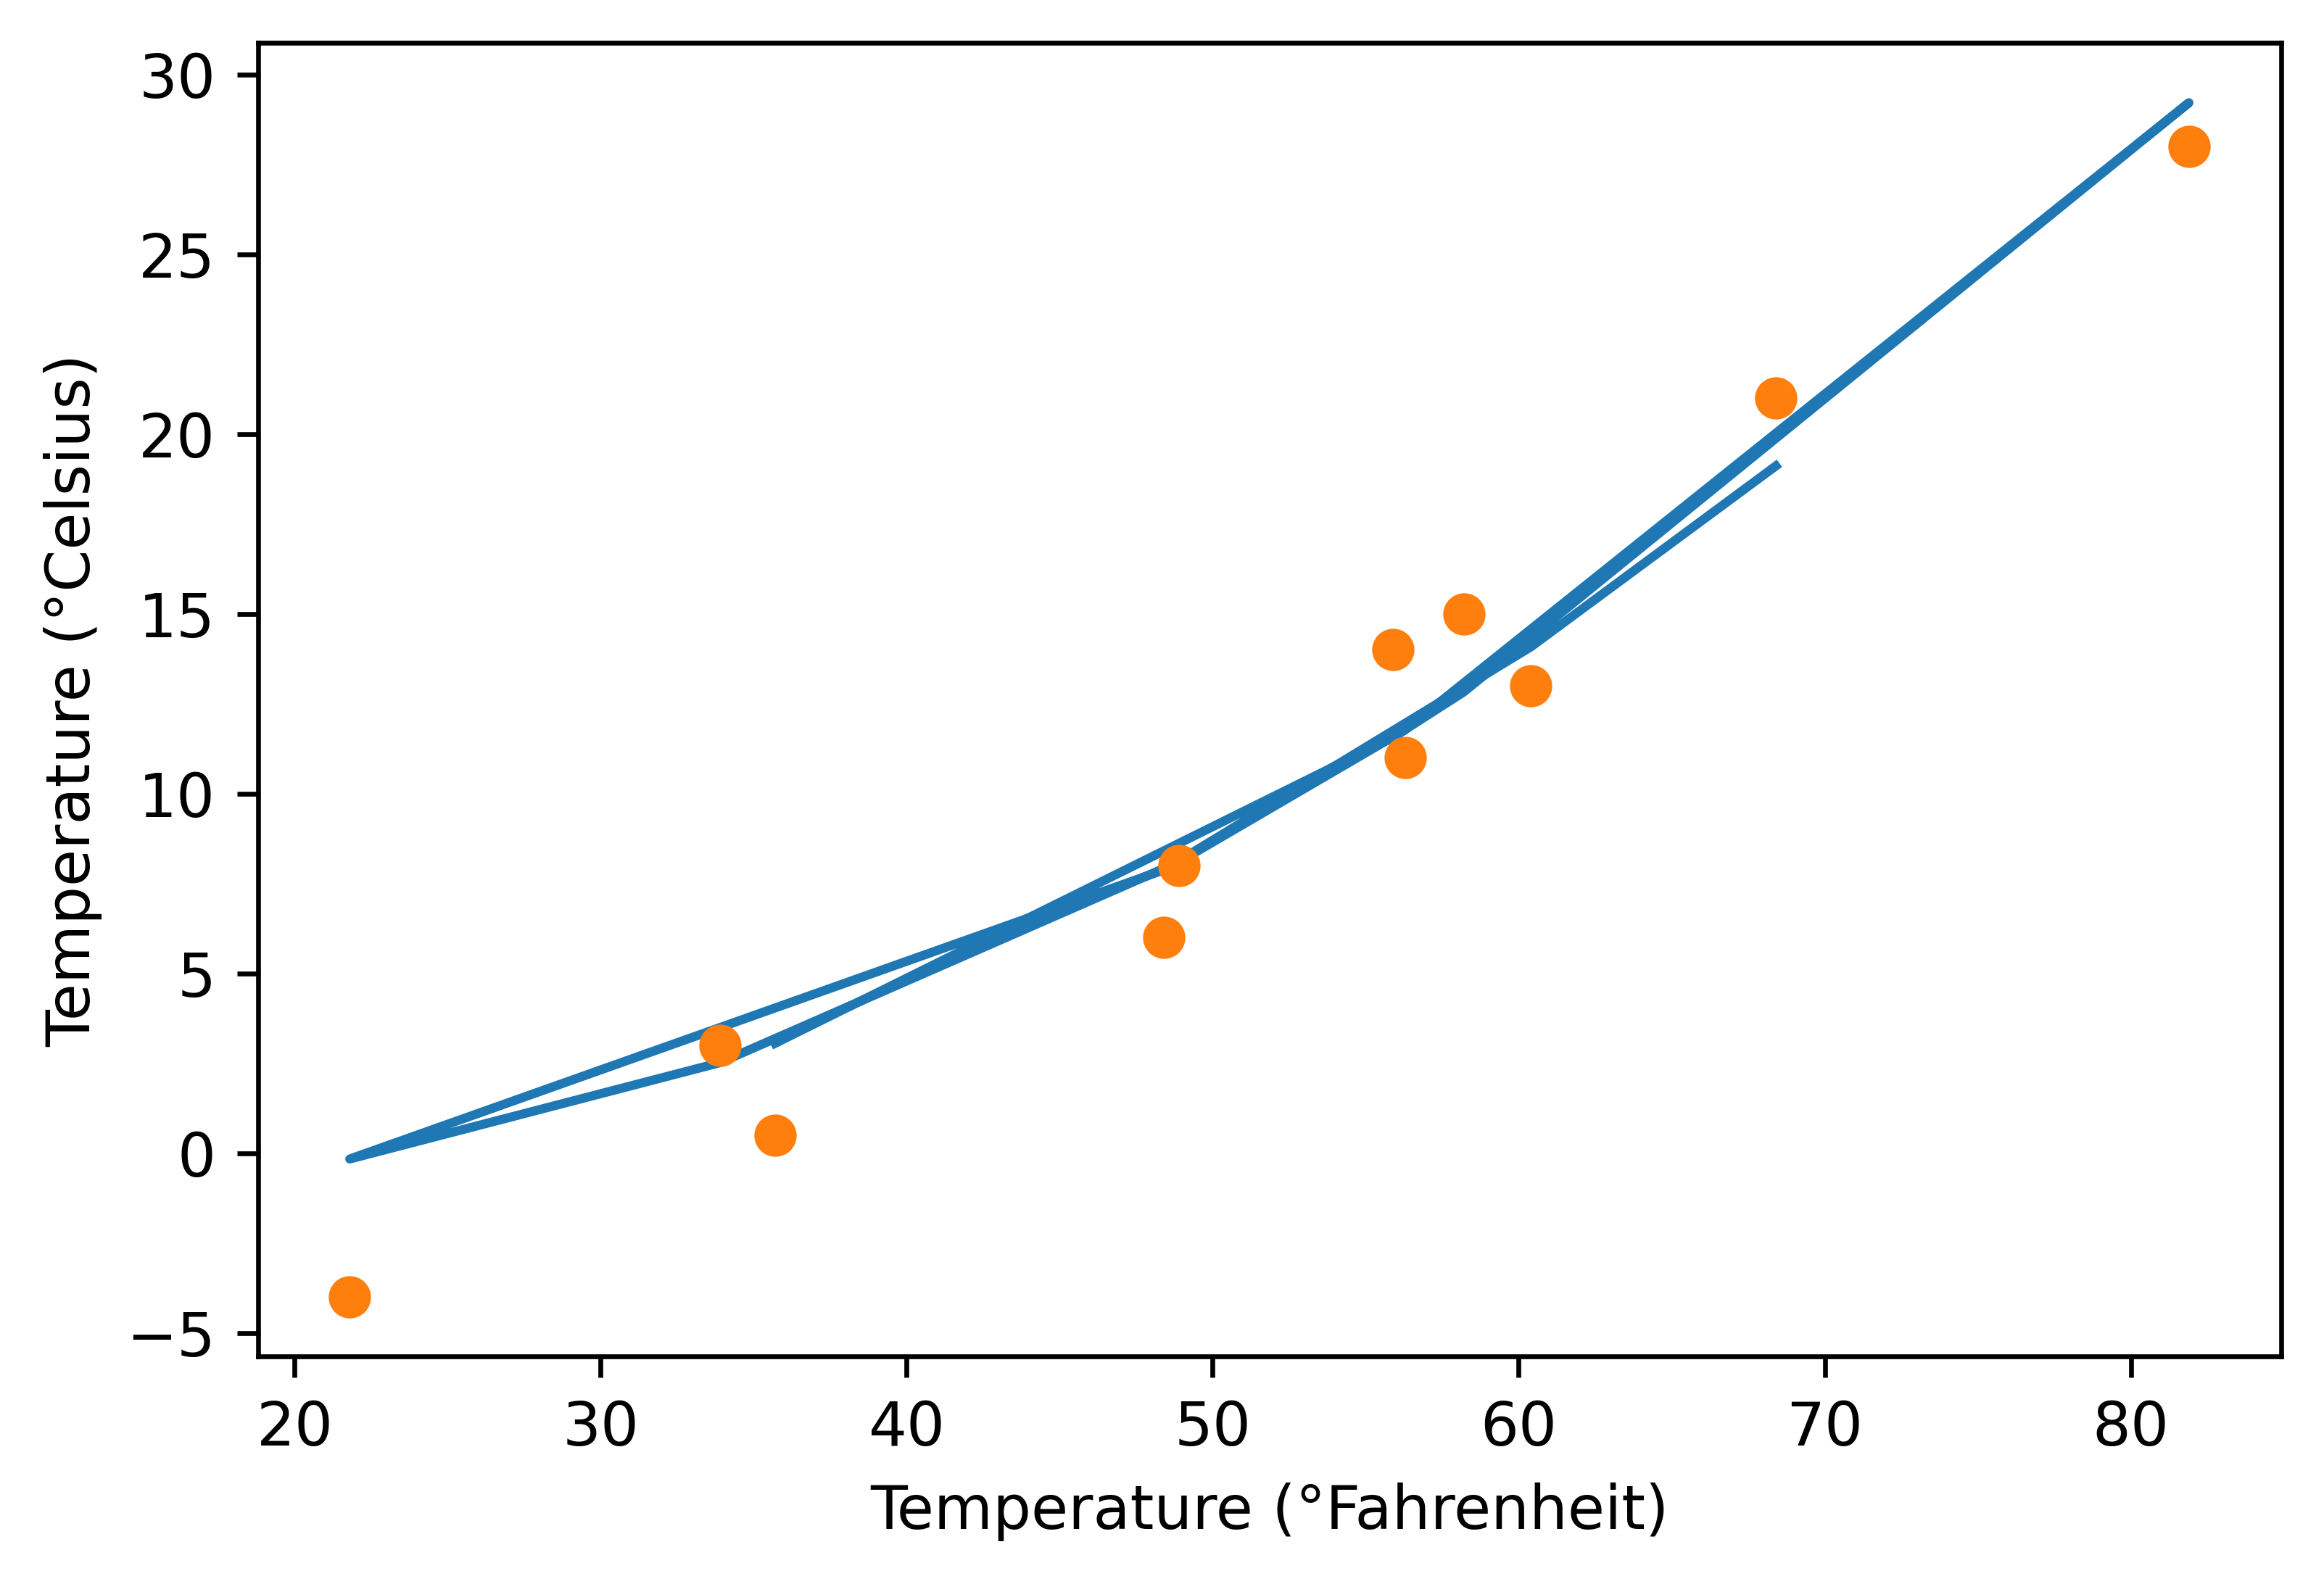

In [25]:
%matplotlib inline
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [26]:
################################################################################################################################
#Problem 3
################################################################################################################################

In [27]:
#Reading training data
import pandas as pd
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [28]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price'] 
Newtrain = housing[num_vars] 
Newtrain.head() 

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [29]:
#Price Predicition
t_area = torch.tensor(Newtrain['area'])
t_bedrooms = torch.tensor(Newtrain['bedrooms'])
t_bathrooms = torch.tensor(Newtrain['bathrooms'])
t_stories = torch.tensor(Newtrain['stories'])
t_parking = torch.tensor(Newtrain['parking'])
t_price = torch.tensor(Newtrain['price'])
#Normalized
t_areaN = t_area / max(Newtrain['area'])
t_bedroomsN = t_bedrooms / max(Newtrain['bedrooms'])
t_bathroomsN = t_bathrooms / max(Newtrain['bathrooms'])
t_storiesN = t_stories / max(Newtrain['stories'])
t_parkingN = t_parking / max(Newtrain['parking'])
def model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, w1, w2, w3, w4, w5, b):
    return w5*t_parking + w4*t_stories + w3*t_bathrooms + w2*t_bedrooms + w1*t_area + b

In [30]:
#Calculating the loss
def loss_fn(t_p, t_price):
    squared_diffs = (t_p - t_price)**2
    return squared_diffs.mean()

In [31]:
params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True)

In [32]:
params.grad is None

True

In [33]:
loss = loss_fn(model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, *params), t_price)
loss.backward()
params.grad

tensor([-5.3383e+10, -2.9247e+07, -1.3220e+07, -1.8557e+07, -7.8404e+06,
        -9.5231e+06])

In [34]:
if params.grad is not None:
    params.grad.zero_()

In [35]:
def training_loop(n_epochs, learning_rate, params, t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, t_price):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, *params) 
        loss = loss_fn(t_p, t_price)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [36]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-1, 
    params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True), # <1> 
    t_area = t_areaN,
    t_bedrooms = t_bedroomsN,
    t_bathrooms = t_bathroomsN,
    t_stories = t_storiesN,
    t_parking = t_parkingN,
    t_price = t_price)

Epoch 500, Loss 1562038501376.000000
Epoch 1000, Loss 1533011427328.000000
Epoch 1500, Loss 1531161870336.000000
Epoch 2000, Loss 1531023589376.000000
Epoch 2500, Loss 1531010482176.000000
Epoch 3000, Loss 1531008778240.000000
Epoch 3500, Loss 1531008516096.000000
Epoch 4000, Loss 1531008516096.000000
Epoch 4500, Loss 1531008516096.000000
Epoch 5000, Loss 1531008516096.000000


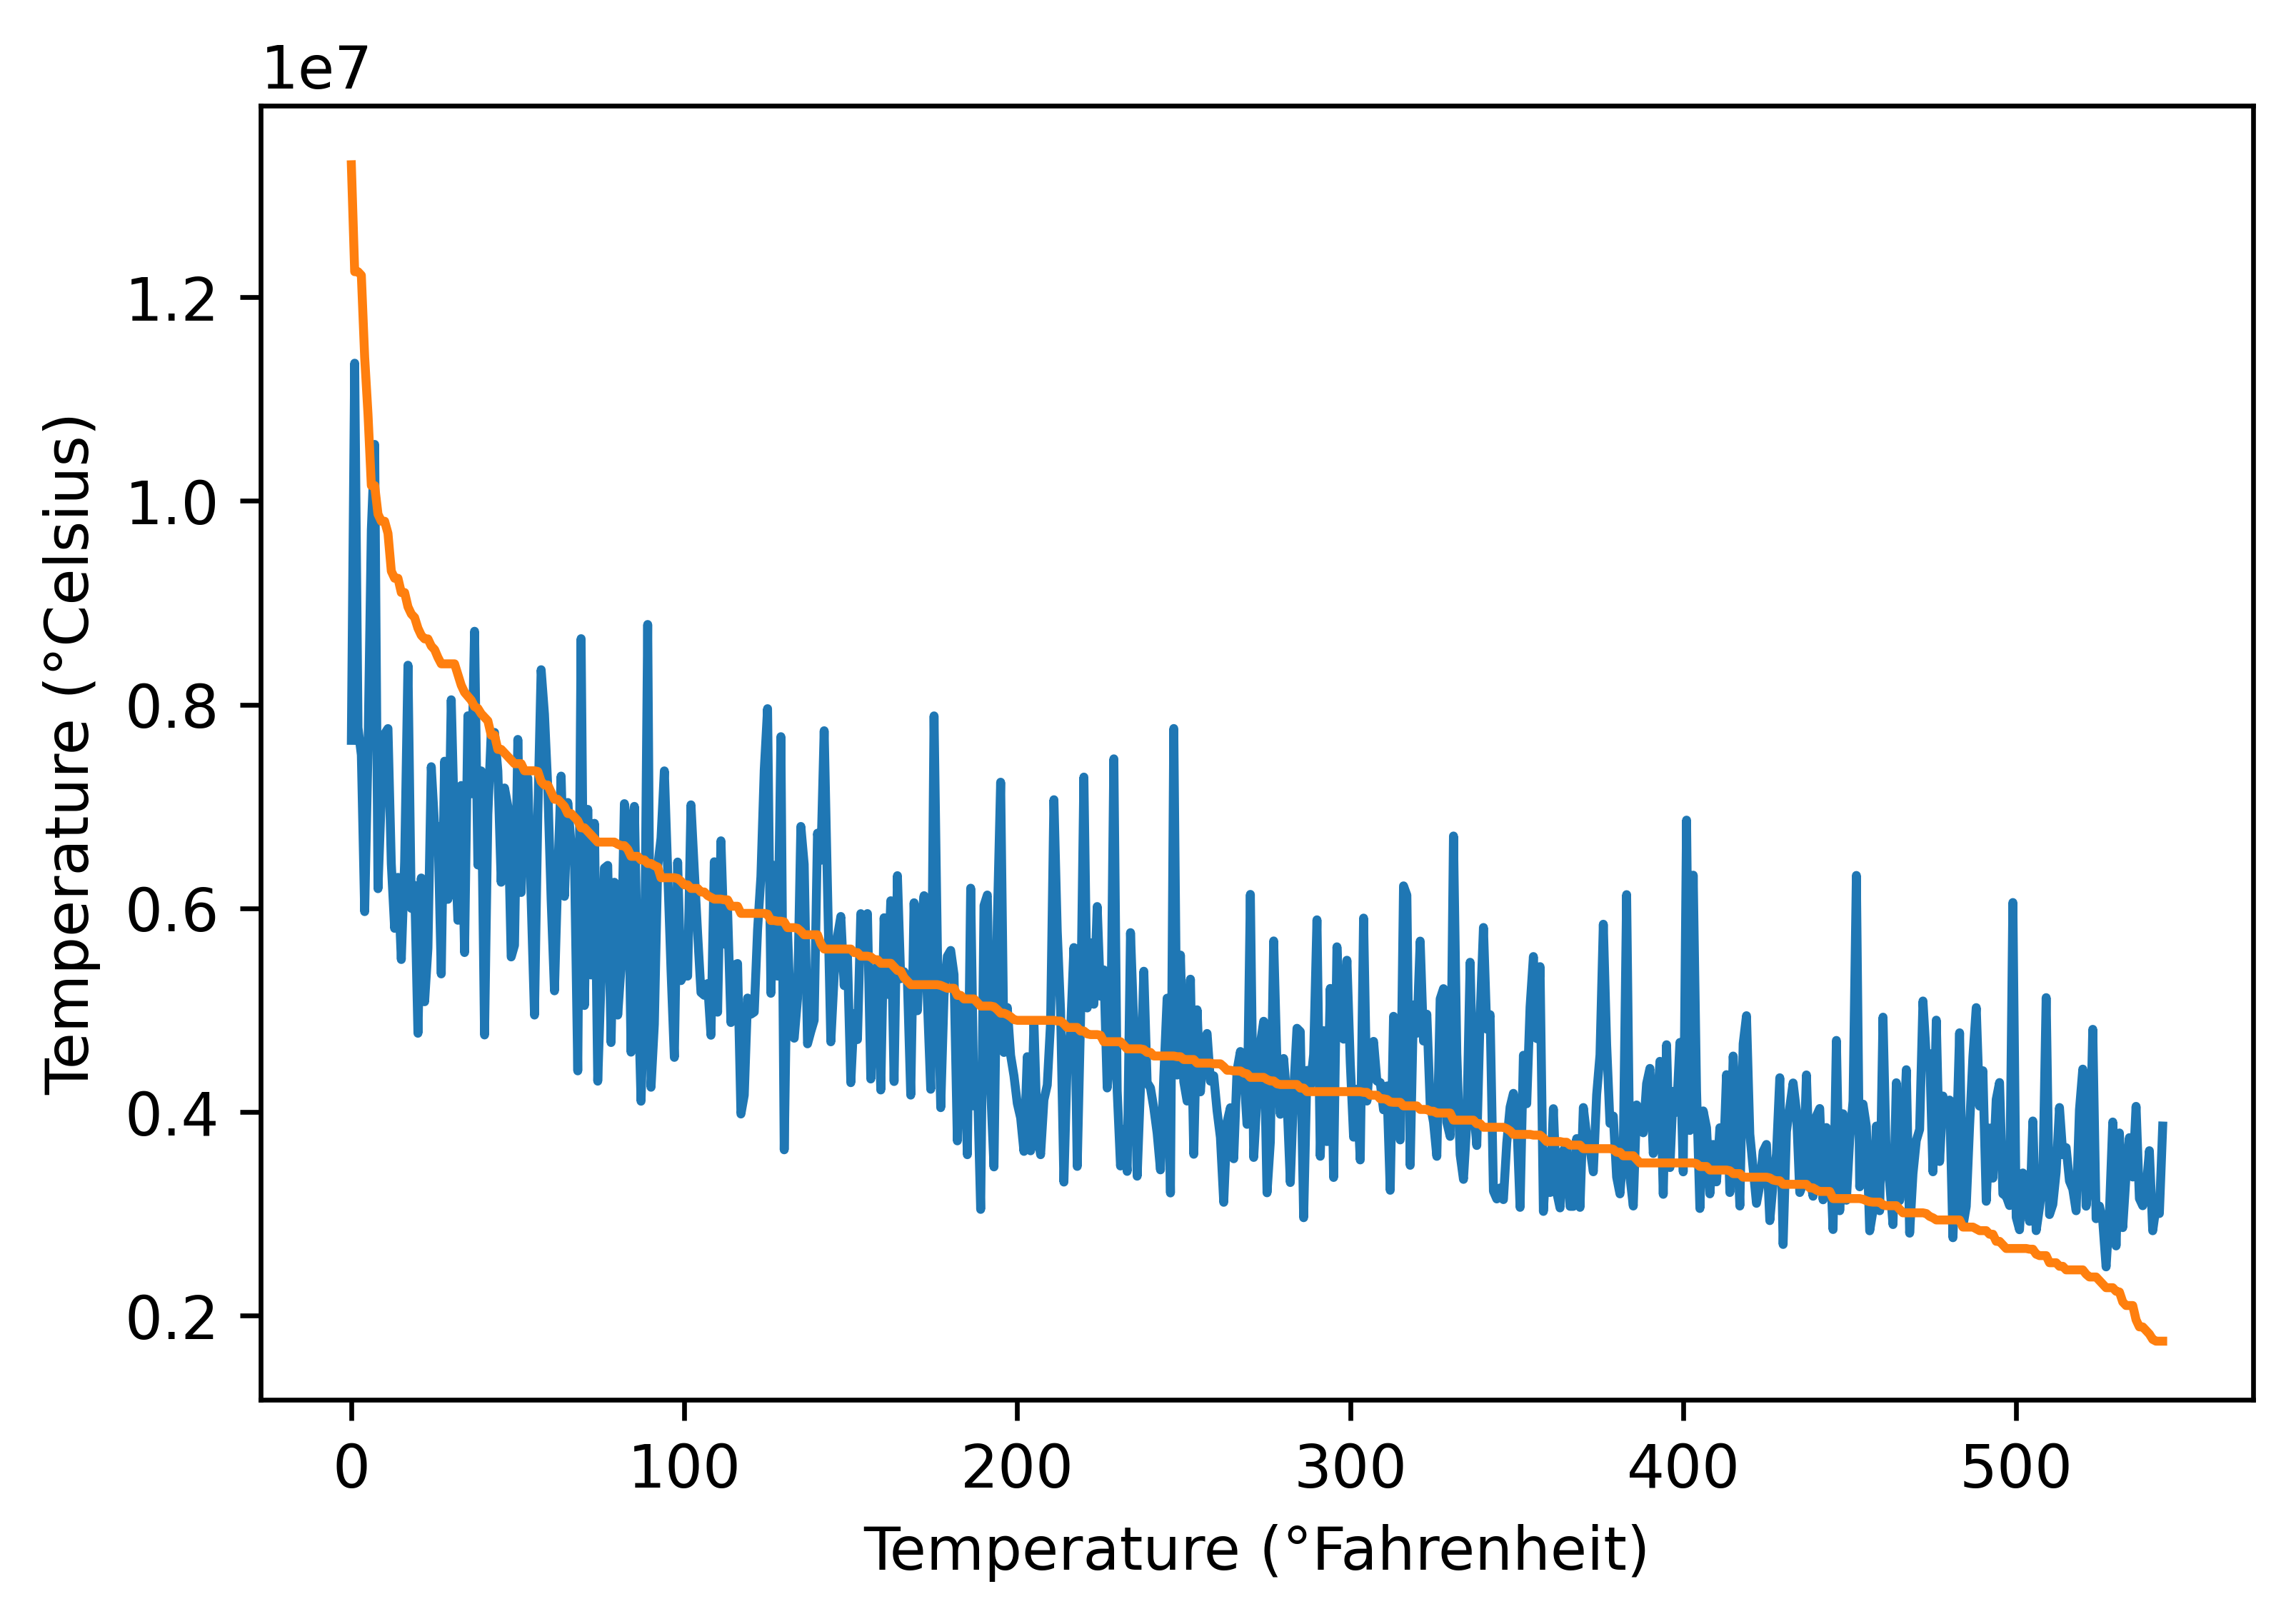

In [37]:
%matplotlib inline
#t_area, t_bedrooms, t_bathrooms, t_stories, t_parking
t_p = model(t_areaN, t_bedroomsN, t_bathroomsN, t_storiesN, t_parkingN, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_p.detach().numpy())
plt.plot(t_price)